<a href="https://colab.research.google.com/github/tanhata/EnergyEfficiency/blob/main/ML_Final_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Factors Impacting Energy Performance**
### By: Tanha

Machine Learning Using Python

UC Berkeley, COMPSCI 433.6-019

Professor Pudipeddi

---


## 1) Introduction

In this project, we explore the following questions:

Do variables such as glazing, surface area, overall height and relative compactness explain the variability in the total heating load of buildings?

Are there variables that once introduces improve the accuracy of these features in prediction of heating load?

**Null Hypothesis:**
The variables of glazing, surface area, overall height and relative compactness do not affect heating load.

**Alternative Hypothesis:**
Heating Load in Buildings follow predictable patterns based on glazing, surface area, overall height and relative compactness.

The hypotheses were tested with this [dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency).


Data exploration and analyses were performed using Python language in a Jupyter notebook. We've leveraged several packages such as pandas, seaborn, statsmnodel, sklearn for data preparation, visualization, analyses and machine learning algorithms to explore the inquiries stated above.

## 2) Background

Heating Load is an important factor that contributes to the energy performance of a building. In most climates, heating loads contribute the largest portion of energy usage in buildings, and are at the forefront of sustainability efforts. Heating loads will ideally be as low as possible and are often cut off at 15/kWh for passive house building principles.

We are using the data in this dataset to predict the heating load by using the various dependent variables that contribute to it. By analyzing this, we can identify points of intervention, to minimize heating loads to optimize passive energy usage.


**Data Fields**


*   Relative Compactness,

*  Surface Area,

*  Wall Area,

*  Roof Area,

*  Overall Height,

*  Orientation,

*  Glazing Area,

*  Glazing Area Distribution,

*  Heating Load,

*  Cooling Load

## 3) Method

The data used was taken from UCI Machine Learning Repository. A dataframe was created and exploritory data analysis was performed. Four machine learning regression models were used; Linear Regression, Decision Tree, Random Forest and Support Vector Regression (SVR). The outcome variable for each model was 'Heating Load'. Each model was evaluated by calculating Mean Squared Error for both test and train, Root Mean Squared Error for both test and train, MSE Ratio, Relative Difference and R2 Score.


# **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Packages**

In [ ]:
# import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


### **Read in Data**

In [ ]:
#df = pd.read_csv('//content//drive//MyDrive//data//ENB2012_data.csv')
df = pd.read_csv('/content/drive/MyDrive/data/ENB2012_data.csv')

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### **Rename Columns**

In [ ]:
df.rename(columns = {'X1':'Relative Compactness', 'X2': 'Surface Area','X3': 'Wall Area','X4': 'Roof Area','X5': 'Overall Height',
                     'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load','Y2': 'Cooling Load'}, inplace = True)


### **Statistical, Data Types and Null Value EDA**

In [ ]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.columns.tolist()

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Roof Area',
 'Overall Height',
 'Orientation',
 'Glazing Area',
 'Glazing Area Distribution',
 'Heating Load',
 'Cooling Load']

In [ ]:
print("Data Types:", df.dtypes)
print("Shape of Dataset:", df.shape)

Data Types: Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object
Shape of Dataset: (768, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
print(df.isnull().sum())

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


We have 9 columns. The dependent columns are Heating and Cooling Load.

Goal: We want to find a linear equation so that we can predict Heating and Cooling Load.

We will consider: *'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', Overall Height',' Orientation', 'Glazing Area', 'Glazing Area Distribution'* as independent variables and Heating and Cooling Load will be our dependent varaible also known as target variables. For this turn of the project, only Heating Load will be used as a target.

In [ ]:
print(df.shape)

(768, 10)


# **Visualizations**

### **Visualize Heating Load and Relative Compactness**
#### Looking for linear relationship

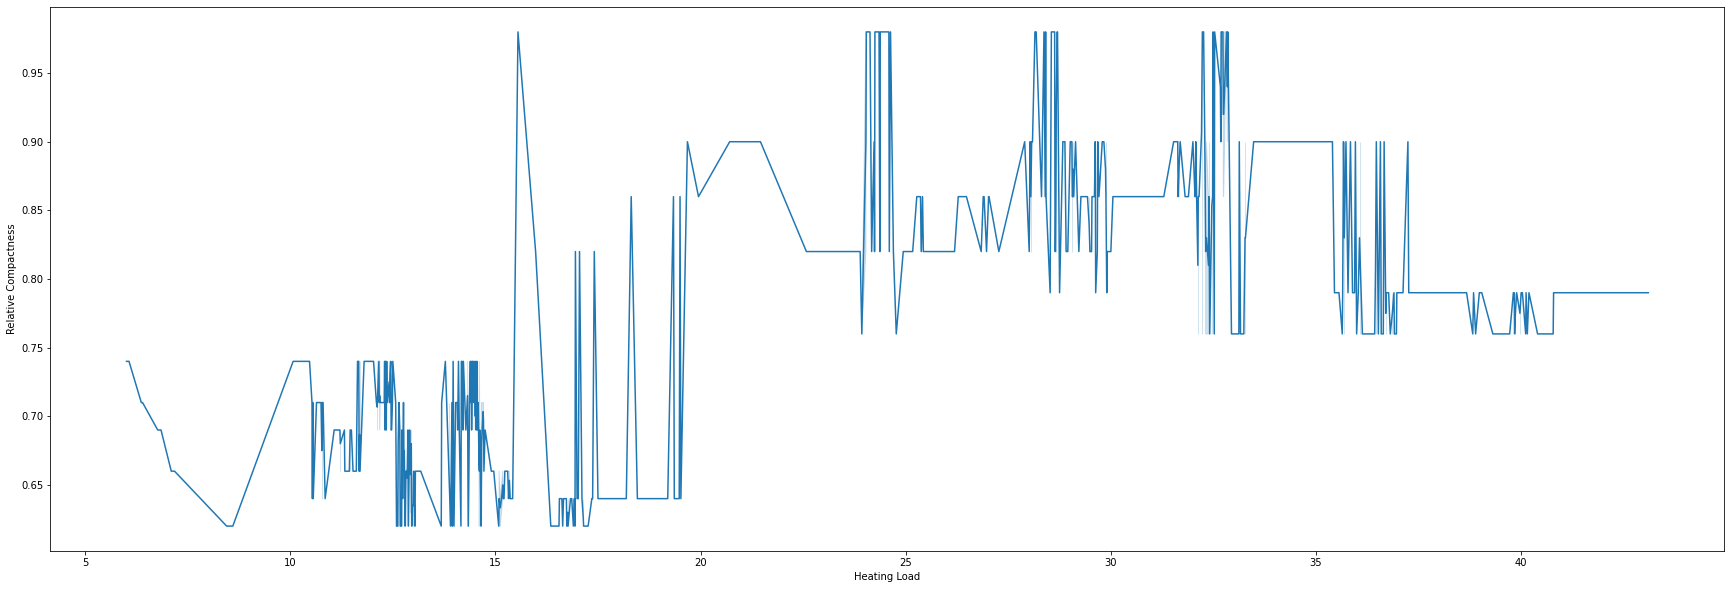

In [ ]:
# Visualize Heating Load and Relative Compactness
fig = plt.figure(figsize=(30,10))
sns.lineplot(x="Heating Load", y ='Relative Compactness', data=df)
plt.ylim= (0,1000)
plt.show()

### **Visualize Heating Load and Overall Height**
#### Looking for linear relationship

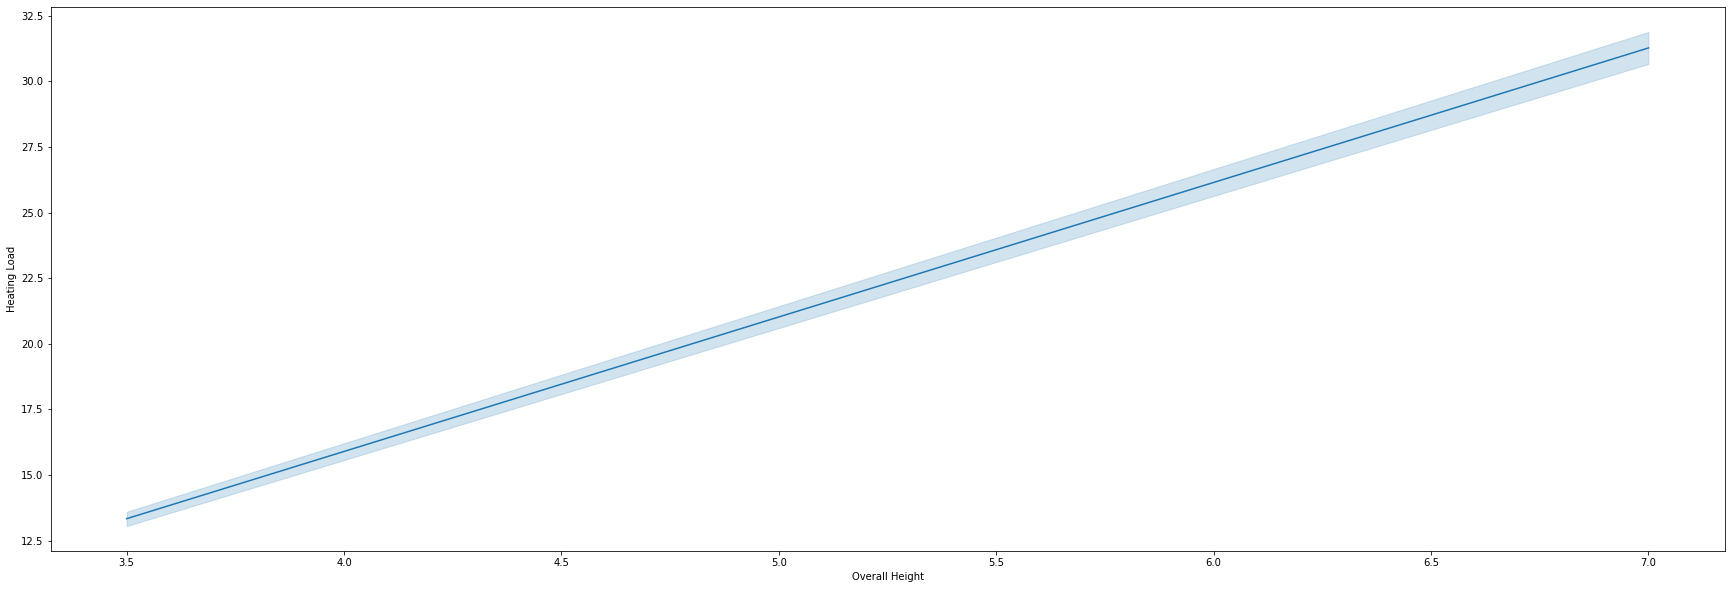

In [ ]:
#Visualize Heating Load and Overall Height
fig = plt.figure(figsize=(30,10))
sns.lineplot(y="Heating Load", x ='Overall Height', data=df)
plt.ylim= (0,1000)
plt.show()

### **Visualize Heating Load and Orientation**
#### Looking for linear relationship

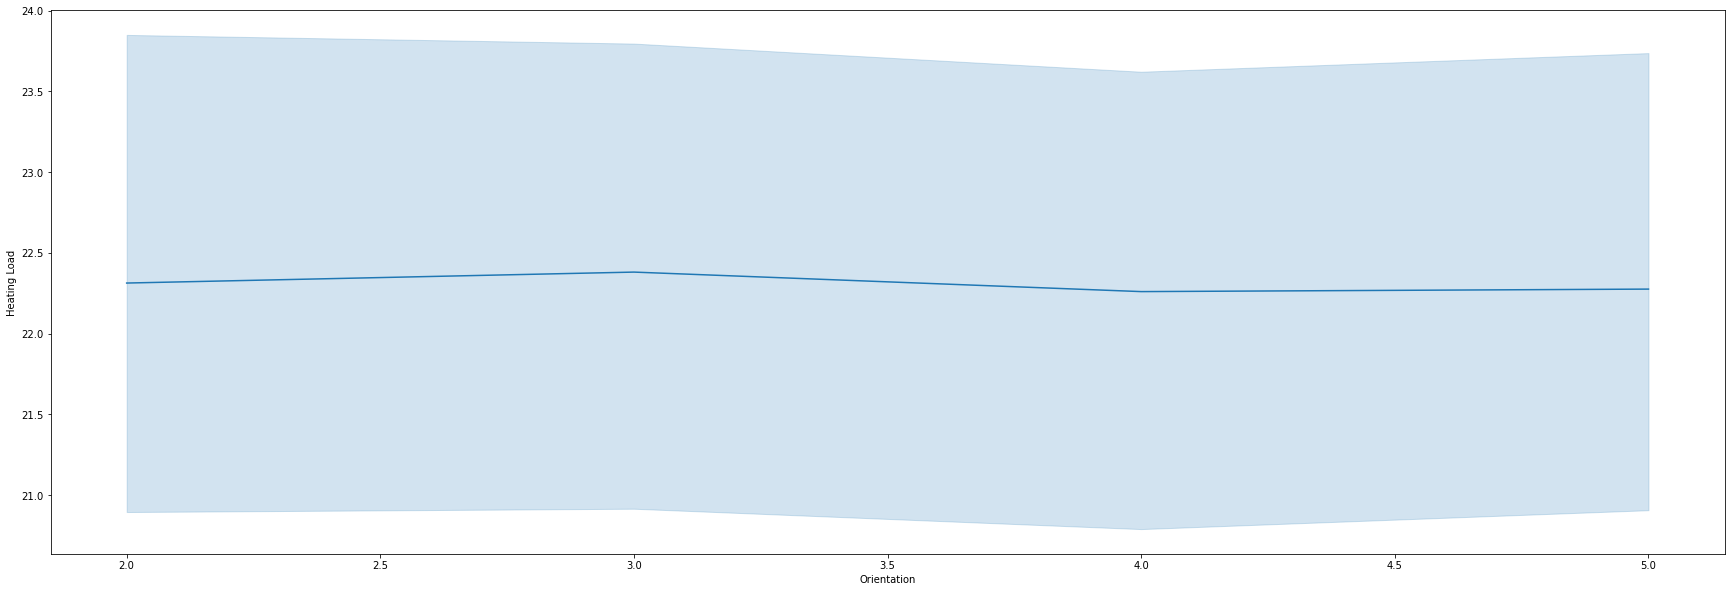

In [ ]:
# Visualize Heating Load and Orientation
fig = plt.figure(figsize=(30,10))
sns.lineplot(y="Heating Load", x='Orientation', data=df)
plt.ylim= (0,1000)
plt.show()

### **Visualize Heating Load and Glazing Area**
#### Looking for linear relationship

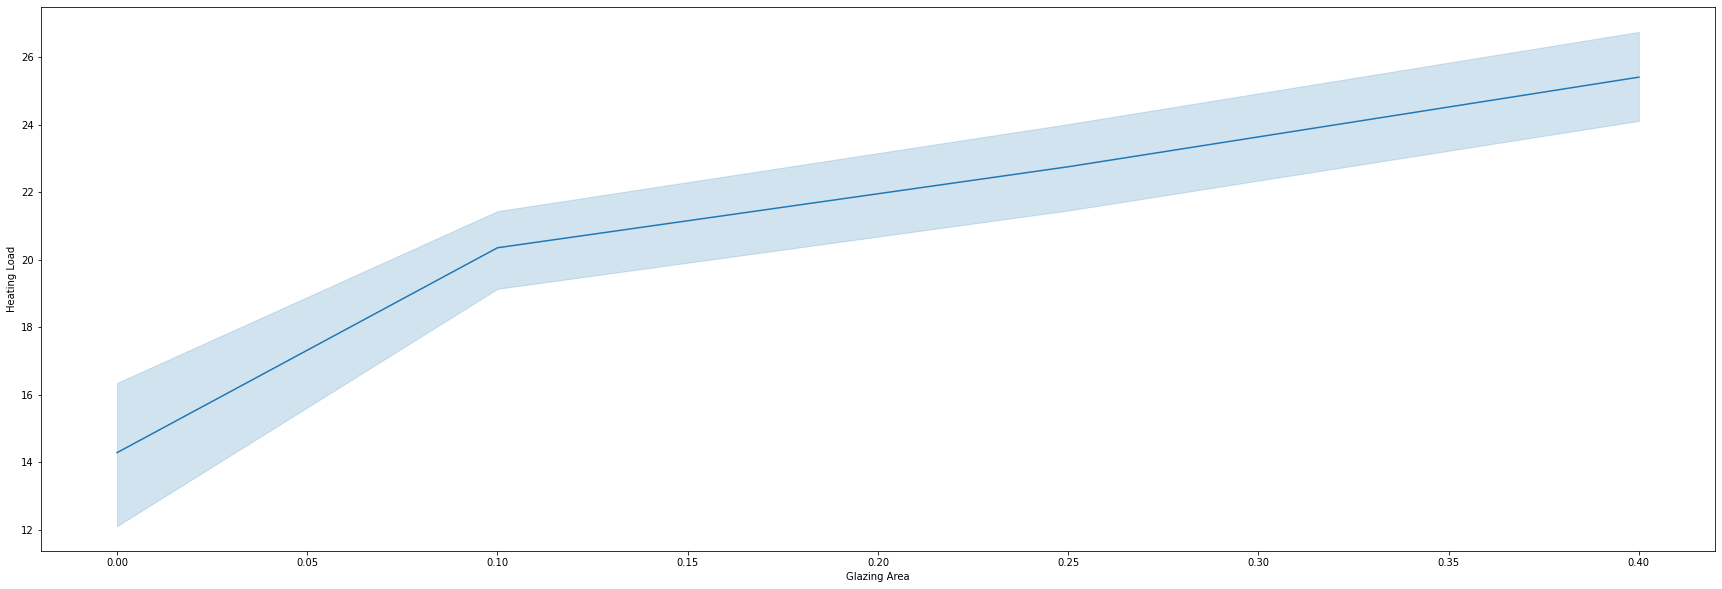

In [ ]:
# Visualize Heating Load and Glazing Area
fig = plt.figure(figsize=(30,10))
sns.lineplot(y="Heating Load", x ='Glazing Area', data=df)
plt.ylim= (0,1000)
plt.show()

### **Visualize Heating Load and Surface Area**
#### Looking for linear relationship

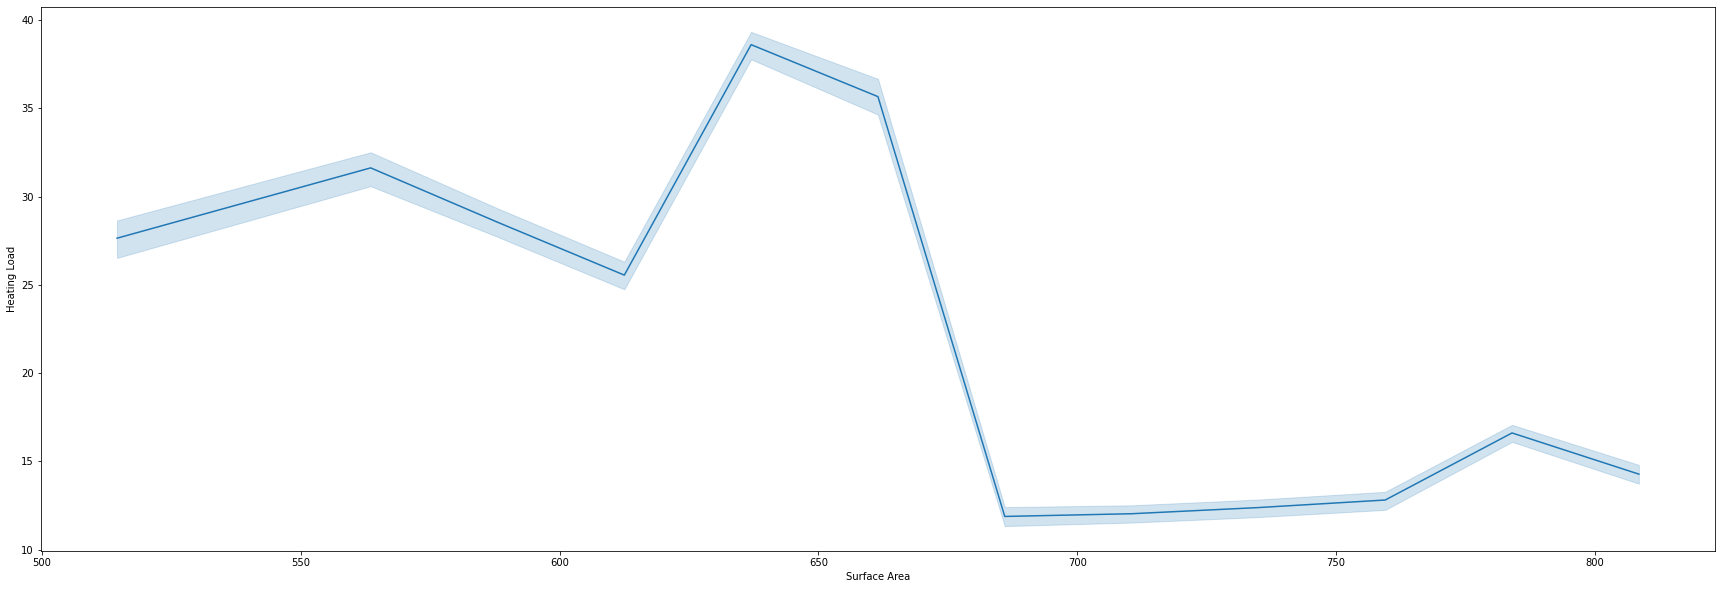

In [ ]:
# Visualize Heating Load and Surface Area
fig = plt.figure(figsize=(30,10))
sns.lineplot(y="Heating Load", x ='Surface Area', data=df)
plt.ylim= (0,1000)
plt.show()

# **Feature Correlations**

In [ ]:
print(df.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')


### **Pair Plot**

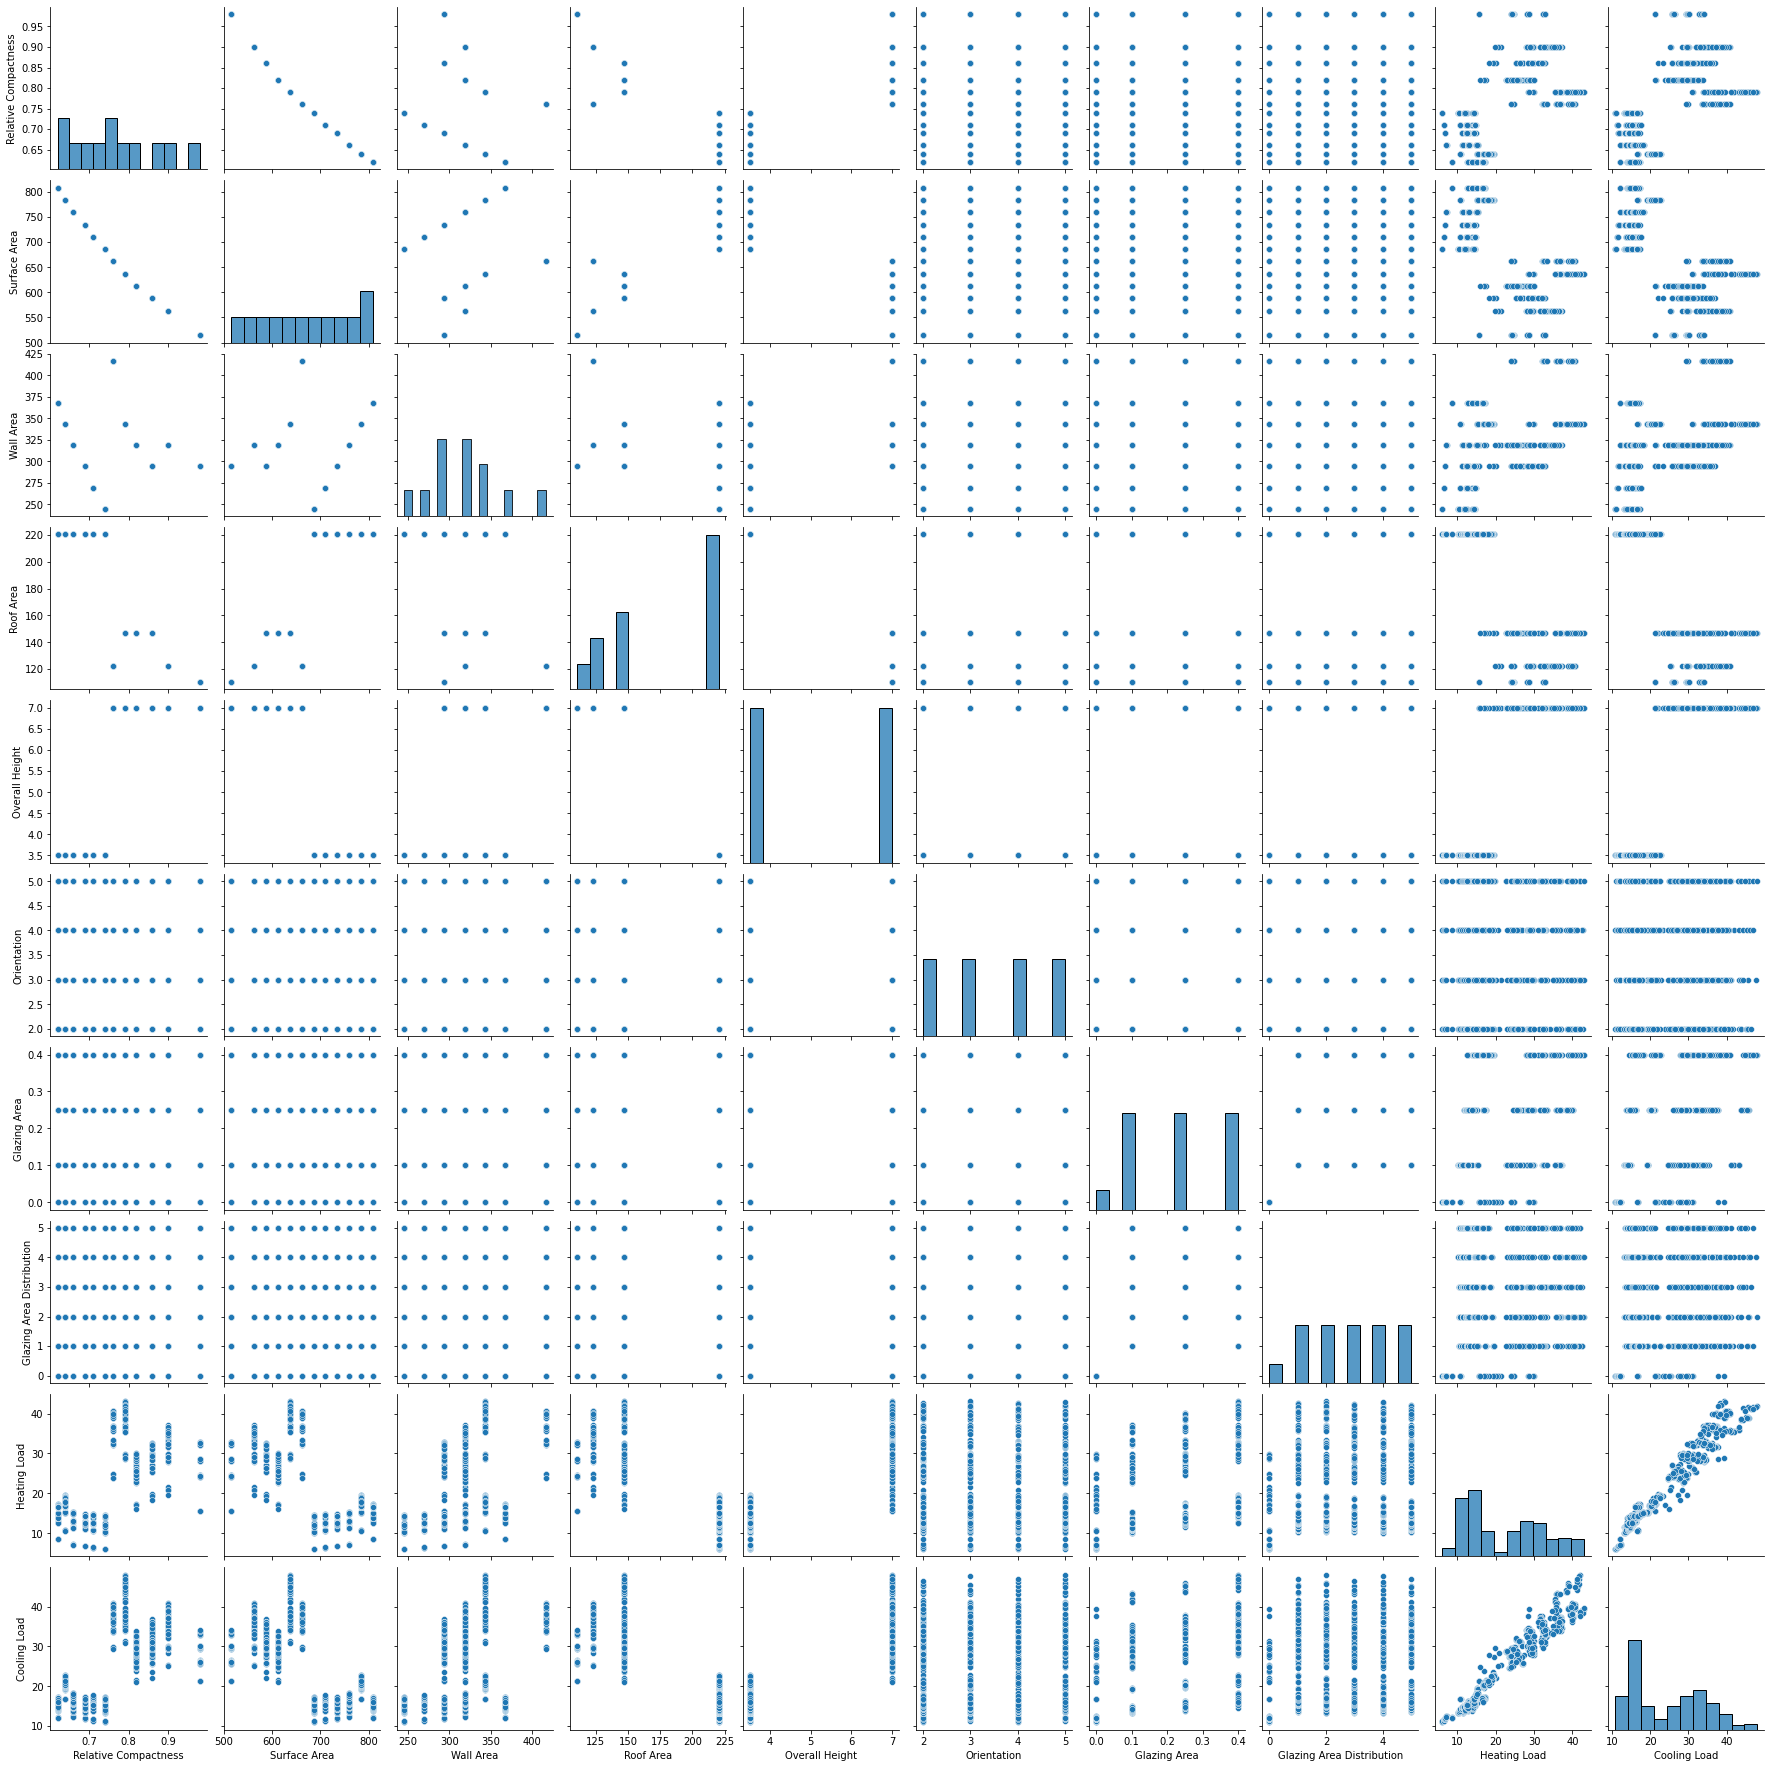

In [ ]:
# pairplot of all data columns
sns.pairplot(df)
plt.show()

### **Heat Maps**

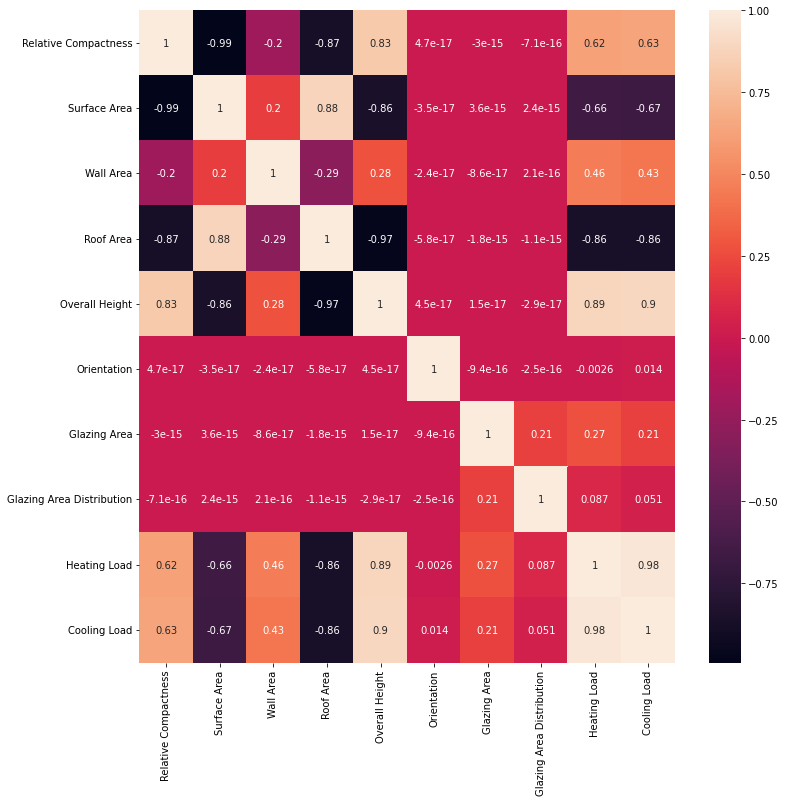

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

(10.5, -0.5)

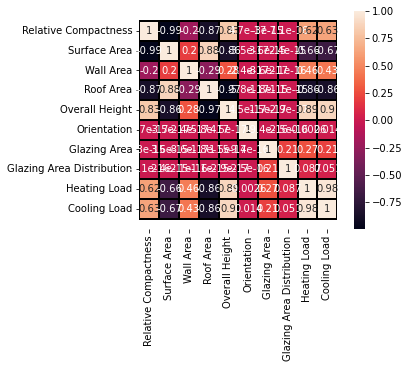

In [ ]:
matrix = np.triu(df.corr())

ax = sns.heatmap(df.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black') #, mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

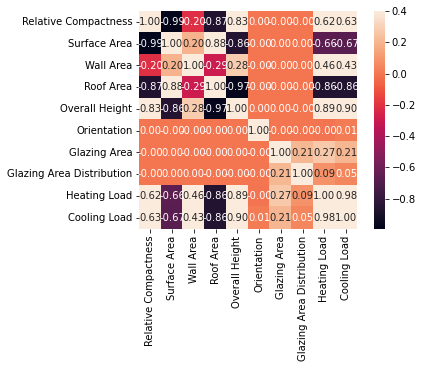

In [ ]:
df_corr =  df.drop("Heating Load", axis=1)
corrmat = df.corr()
sns.heatmap(corrmat, vmax = .4, square=True, annot=True, fmt=".2f")
plt.show()

(10.5, -0.5)

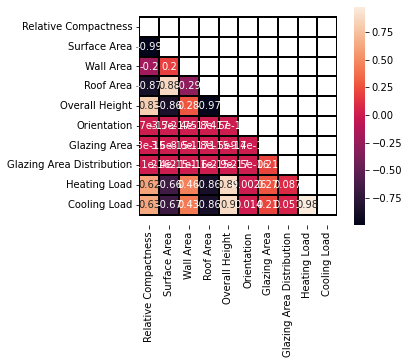

In [ ]:
matrix = np.triu(df.corr())

ax = sns.heatmap(df.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# From the heatmap, we observe that

1) Heating Load is not linearly related to: Roof Area, Surface Area.

2) Heating Load is linearly positively related to: Relative Compactness, Wall Area, Height, Orientation, Glazing Area.

### **Min / Max for Heating Load**

In [ ]:
print("Heating Load Min Amount: ", min(df["Heating Load"]))
print("Heating Load Max Amount: ", max(df["Heating Load"]))

Heating Load Min Amount:  6.01
Heating Load Max Amount:  43.1


# **Scaling the Data**

In [ ]:
a_scaler = StandardScaler() # creating an instance of Standard Scaler
df_independent = a_scaler.fit_transform(df[['Relative Compactness','Wall Area', 'Overall Height', 'Orientation', 'Glazing Area']])

# **Linear Regression Model**

In [ ]:
df_independent1 = a_scaler.fit_transform(df[['Relative Compactness','Wall Area', 'Overall Height', 'Orientation', 'Glazing Area']])
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_independent1, df["Heating Load"], test_size=0.2, random_state=4)

reg1 = linear_model.LinearRegression() # linear regression object creation
reg1.fit(x_train1, y_train1) # fitting the data

print('Linear Model Coefficient is: ', reg1.coef_,)
print('Linear Model Intercept is: ', reg1.intercept_, '\n')

print('+++++++++++++++++++++++++++ \n')

yhat1 = reg1.predict(x_test1)  # prediction on x_test1

y_t_predict1 = reg1.predict(x_train1) # prediction on x_train1

mse_test1 = mean_squared_error(y_test1, yhat1)
mse_train1 = mean_squared_error(y_train1, y_t_predict1)

# Mean Squared Error, Root Mean Squared Error and Score for Linear Regression
print('Test Linear Regression Mean Squared Error: ', metrics.mean_squared_error(y_test1, yhat1))
print('Train Linear Regression Mean Squared Error: ', metrics.mean_squared_error(y_train1, y_t_predict1), '\n')
print('Test Linear Regression Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test1, yhat1)))
print('Train Linear Regression Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train1, y_t_predict1)), '\n')

print('+++++++++++++++++++++++++++ \n')

print("Linear Regression MSE Ratio is : ", mse_test1/mse_train1)
print("Linear Regression Relative Difference is: ", np.abs(mse_train1-mse_test1)/mse_train1, '\n')
print("Linear Regression R-Squared for the test data: ", r2_score(y_test1, yhat1))
print("Linear Regression R-Squared for the train data: ", r2_score(y_train1, y_t_predict1), '\n')
print("This is an accurate model")

Linear Model Coefficient is:  [-1.49766104  1.54621526  9.73570673 -0.03936433  2.79562002]
Linear Model Intercept is:  22.25729006911596 

+++++++++++++++++++++++++++ 

Test Linear Regression Mean Squared Error:  7.7264096254238295
Train Linear Regression Mean Squared Error:  9.217626529259146 

Test Linear Regression Root Mean Squared Error:  2.7796419959095147
Train Linear Regression Root Mean Squared Error:  3.0360544345019815 

+++++++++++++++++++++++++++ 

Linear Regression MSE Ratio is :  0.8382211625626396
Linear Regression Relative Difference is:  0.16177883743736046 

Linear Regression R-Squared for the test data:  0.9214184794139934
Linear Regression R-Squared for the train data:  0.9100335336986907 

This is an accurate model


### **Distribution plot of predicted values for Linear Regression**

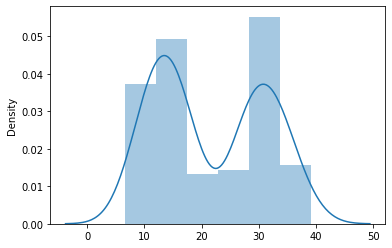

In [ ]:
# Prediction distribution
sns.distplot(yhat1)

# **Decision Tree Model**
#### With GridSearchCV to find the best parameters

In [ ]:
# Split data for train / test
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_independent1, df["Heating Load"], test_size=0.2, random_state=4)

# Find best parameters using GridSearch CV
parameters = {'splitter' : ['best', 'random'], 'max_depth' : [3, 5, 7, 9, 11, 12],
                         'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_features' : ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes' : [None, 30, 40, 50, 60, 70, 80]}

# Set Decision Tree Regressor
dt = DecisionTreeRegressor()

grid = GridSearchCV(dt, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 3, verbose = 3)

final_grid = grid.fit(x_train2, y_train2)

# best hyperparameters
final_grid.best_params_


In [ ]:
# Set Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth = 5, max_features = None, max_leaf_nodes = 60, min_samples_leaf = 7,
                           min_weight_fraction_leaf = 0.1, splitter = 'best')

# Train the model
dt.fit(x_train2, y_train2)

# Predict on test
yhat2 = dt.predict(x_test2)

# Predict on train
y_t_predict2 = dt.predict(x_train2)


In [ ]:
# MSE of test and train
mse_test2 = mean_squared_error(y_test2, yhat2)
mse_train2 = mean_squared_error(y_train2, y_t_predict2)

# Mean Squared Error, Root Mean Squared Error for Decision Tree
print('Test Decision Tree Mean Squared Error: ', metrics.mean_squared_error(y_test2, yhat2))
print('Train Decision Tree Mean Squared Error: ', metrics.mean_squared_error(y_train2, y_t_predict2), '\n')
print('Test Decision Tree Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test2, yhat2)))
print('Train Decision Tree Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train2, y_t_predict2)), '\n')

print('+++++++++++++++++++++++++++ \n')

print("Decision Tree MSE Ratio is : ", mse_test2/mse_train2)
print("Decision Tree Relative Difference is: ", np.abs(mse_train2-mse_test2)/mse_train2, '\n')
print("Decision Tree R-Squared for the test data: ", r2_score(y_test2, yhat2))
print("Decision Tree R-Squared for the train data: ", r2_score(y_train2, y_t_predict2))

Test Decision Tree Mean Squared Error:  5.588401134404042
Train Decision Tree Mean Squared Error:  7.538163225940429 

Test Decision Tree Root Mean Squared Error:  2.3639799352794943
Train Decision Tree Root Mean Squared Error:  2.7455715663483313 

+++++++++++++++++++++++++++ 

Decision Tree MSE Ratio is :  0.7413478544976527
Decision Tree Relative Difference is:  0.2586521455023472 

Decision Tree R-Squared for the test data:  0.9431631145543949
Decision Tree R-Squared for the train data:  0.9264255385388405


## Distribution plot of predicted values for Decision Tree

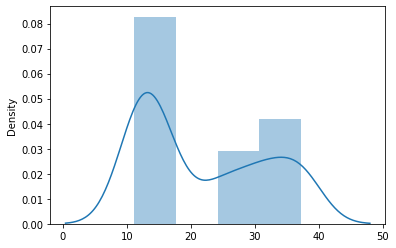

In [ ]:
# Prediction distribution
sns.distplot(yhat2)

# **Random Forest Model**
#### With GridSearchCV to find the best parameters

In [ ]:
# Split data for train / test
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_independent1, df["Heating Load"], test_size=0.2, random_state=4)

# Find best parameters using GridSearch CV
parameters = {'n_estimators' : [50, 100, 300, 500], 'max_depth' : [3, 5, 7, 9, 11, 12],
              'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_leaf_nodes' : [None, 30, 40, 50, 60, 70, 80]}

# Set Random Forest Regressor
rf = RandomForestRegressor()

grid = GridSearchCV(rf, param_grid = parameters, cv = 3, verbose = 3)

final_grid = grid.fit(x_train3, y_train3)

# best hyperparameters
final_grid.best_params_

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=100;, score=0.949 total time=   0.1s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=300;, score=0.946 total time=   0.4s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=300;, score=0.952 total time=   0.4s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=300;, score=0.951 total time=   0.4s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=500;, score=0.944 total time=   0.6s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=500;, score=0.952 total time=   0.6s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, n_estimators=500;, score=0.950 total time=   0.6s
[CV 1/3] END 

{'max_depth': 12,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [ ]:
# Set RandomForestRegressor
rf = RandomForestRegressor(max_depth = 12, max_leaf_nodes = 40, min_samples_leaf = 1, n_estimators = 50)

# train the model
rf.fit(x_train3, y_train3)

# Predict on test
yhat3 = rf.predict(x_test3)

# Predict on train
y_t_predict3 = rf.predict(x_train3)

In [ ]:
# MSE of test and train
mse_test3 = mean_squared_error(y_test3, yhat3)
mse_train3 = mean_squared_error(y_train3, y_t_predict3)

# Mean Squared Error, Root Mean Squared Error for Random Forest
print('Test Random Forest Mean Squared Error: ', mean_squared_error(y_test3, yhat3))
print('Train Random Forest Mean Squared Error: ', mean_squared_error(y_train3, y_t_predict3), '\n')
print('Test Random Forest Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test3, yhat3)))
print('Train Random Forest Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train3, y_t_predict3)), '\n')

print('+++++++++++++++++++++++++++ \n')

print("Random Forest MSE Ratio is : ", mse_test3/mse_train3)
print("Random Forest Relative Difference is: ", np.abs(mse_train3-mse_test3)/mse_train3, '\n')
print("Random Forest R-Squared for the test data: ", r2_score(y_test3, yhat3))
print("Random Forest R-Squared for the train data: ", r2_score(y_train3, y_t_predict3))

Test Random Forest Mean Squared Error:  0.2564236706973696
Train Random Forest Mean Squared Error:  0.2019643484791997 

Test Random Forest Root Mean Squared Error:  0.5063829289158251
Train Random Forest Root Mean Squared Error:  0.4494044375383934 

+++++++++++++++++++++++++++ 

Random Forest MSE Ratio is :  1.2696481959724624
Random Forest Relative Difference is:  0.26964819597246226 

Random Forest R-Squared for the test data:  0.997392040684545
Random Forest R-Squared for the train data:  0.998028774685778


## Distribution plot of predicted values for Random Forest

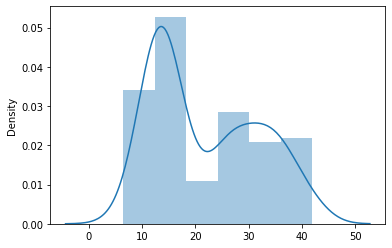

In [ ]:
# Prediction distribution
sns.distplot(yhat3)

## **SVR Model**

In [ ]:
# Split data for train / test
x_train4, x_test4, y_train4, y_test4 = train_test_split(df_independent1, df["Heating Load"], test_size=0.2, random_state=4)
# Set SVR
svreg = SVR()

# train the model
svreg.fit(x_train4, y_train4)

# Predict on test
yhat4 = svreg.predict(x_test4)

# Predict on train
y_t_predict4 = rf.predict(x_train4)

In [ ]:
# MSE of test and train
mse_test4 = mean_squared_error(y_test4, yhat4)
mse_train4 = mean_squared_error(y_train4, y_t_predict4)

# Mean Squared Error, Root Mean Squared Error for SVR
print('Test SVR Mean Squared Error: ', metrics.mean_squared_error(y_test4, yhat4))
print('Train SVR Mean Squared Error: ', metrics.mean_squared_error(y_train4, y_t_predict4), '\n')
print('Test SVR Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test4, yhat4)))
print('Train SVR Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train4, y_t_predict4)), '\n')

print('+++++++++++++++++++++++++++ \n')

print("SVR MSE Ratio is : ", mse_test4/mse_train4)
print("SVR Relative Difference is: ", np.abs(mse_train4-mse_test4)/mse_train4, '\n')
print("SVR R-Squared for the test data: ", r2_score(y_test4, yhat4))
print("SVR R-Squared for the train data: ", r2_score(y_train4, y_t_predict4))

Test SVR Mean Squared Error:  6.1329836774845505
Train SVR Mean Squared Error:  0.2019643484791997 

Test SVR Root Mean Squared Error:  2.4764861553185695
Train SVR Root Mean Squared Error:  0.4494044375383934 

+++++++++++++++++++++++++++ 

SVR MSE Ratio is :  30.36666482805596
SVR Relative Difference is:  29.36666482805596 

SVR R-Squared for the test data:  0.9376244327611016
SVR R-Squared for the train data:  0.998028774685778


### **Distribution plot of predicted values for SVR**

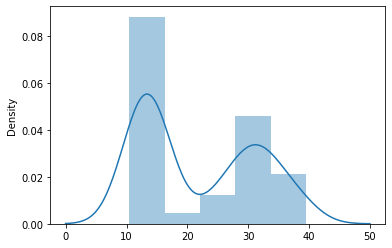

In [ ]:
# Prediction distribution
sns.distplot(yhat4)

# **Conclusion**

Throughout the project, we found that Heating Load could be accurately predicted based on the variables Relative Compactness, Wall Area, Overall Height, Orientation and Glazing Area. Because of this, it is possible for experts in the field of Heating Load to use these variables during the planning stages for a new building to figure out the heating load of the building before they even break ground. This would allow them to build smarter and more energy effecient buildings.




All the models performed well, with r2 scores above 0.9 for each. Of all the models created, Random Forest performed the best with an r2 score of 0.997. At first observation, the SME and RSME seem extremely low at 0.25 and 0.50. These are the lowest of all the models. However after evaluating the train SME and RSME and finding them to be similar, it seems that the model is running well and not overfitting the data.

As for our original hypothesis: Heating Load in Buildings follow predictable patterns based on Relative Compactness, Wall Area, Overall Height, Orientation and Glazing Area, we found this to be true.  The distribution plot of the predicted values have very similar distribution patterns for each model attempted.